# Exercises week 7 - Tabular data analysis with Pandas

## Popular movies

We will work with a dataset of popular movies: https://perso.telecom-paristech.fr/eagan/class/igr204/data/film.csv

Before you begin, run the code in this notebook to load the data and confirm that everything works. Go to the Cell menu, and press Run All.

In [198]:
# Let's first try to look at the file.
# We pass a special option errors='replace' to continue reading the file
# even when there are issues with accents.
with open('data/film.csv', encoding='utf8', errors='replace') as inp:
    print(inp.read()[:1000])

Year;Length;Title;Subject;Actor;Actress;Director;Popularity;Awards;*Image
INT;INT;STRING;CAT;CAT;CAT;CAT;INT;BOOL;STRING
1990;111;Tie Me Up! Tie Me Down!;Comedy;Banderas, Antonio;Abril, Victoria;Almod�var, Pedro;68;No;NicholasCage.png
1991;113;High Heels;Comedy;Bos�, Miguel;Abril, Victoria;Almod�var, Pedro;68;No;NicholasCage.png
1983;104;Dead Zone, The;Horror;Walken, Christopher;Adams, Brooke;Cronenberg, David;79;No;NicholasCage.png
1979;122;Cuba;Action;Connery, Sean;Adams, Brooke;Lester, Richard;6;No;seanConnery.png
1978;94;Days of Heaven;Drama;Gere, Richard;Adams, Brooke;Malick, Terrence;14;No;NicholasCage.png
1983;140;Octopussy;Action;Moore, Roger;Adams, Maud;Glen, John;68;No;NicholasCage.png
1984;101;Target Eagle;Action;Connors, Chuck;Adams, Maud;Loma, Jos� Antonio de la;14;No;NicholasCage.png
1989;99;American Angels: Baptism of Blood, The;Drama;Bergen, Robert D.;Adams, Trudy;Sebastian, Beverly;28;No;NicholasCage.png
1985;104;Subway;Drama;Lambert, Christopher;Adjani, Isabelle;Besso

In [199]:
# The special question mark symbols indicate that this file is not encoded with UTF-8.
# Let's try again with a different encoding:
with open('data/film.csv', encoding='latin1') as inp:
    print(inp.read()[:1000])

Year;Length;Title;Subject;Actor;Actress;Director;Popularity;Awards;*Image
INT;INT;STRING;CAT;CAT;CAT;CAT;INT;BOOL;STRING
1990;111;Tie Me Up! Tie Me Down!;Comedy;Banderas, Antonio;Abril, Victoria;Almodóvar, Pedro;68;No;NicholasCage.png
1991;113;High Heels;Comedy;Bosé, Miguel;Abril, Victoria;Almodóvar, Pedro;68;No;NicholasCage.png
1983;104;Dead Zone, The;Horror;Walken, Christopher;Adams, Brooke;Cronenberg, David;79;No;NicholasCage.png
1979;122;Cuba;Action;Connery, Sean;Adams, Brooke;Lester, Richard;6;No;seanConnery.png
1978;94;Days of Heaven;Drama;Gere, Richard;Adams, Brooke;Malick, Terrence;14;No;NicholasCage.png
1983;140;Octopussy;Action;Moore, Roger;Adams, Maud;Glen, John;68;No;NicholasCage.png
1984;101;Target Eagle;Action;Connors, Chuck;Adams, Maud;Loma, José Antonio de la;14;No;NicholasCage.png
1989;99;American Angels: Baptism of Blood, The;Drama;Bergen, Robert D.;Adams, Trudy;Sebastian, Beverly;28;No;NicholasCage.png
1985;104;Subway;Drama;Lambert, Christopher;Adjani, Isabelle;Besso

OK, the accents look good now, so `latin1` was a good guess.

But there are a few other issues:

- It's called a **comma** separated value (csv) file, but this one is separated with semicolons.
- The first row contains the headers, which we want to use as labels. However, the second row contains types, and we don't want that to end up in our dataframe, so we skip this row.
- The last column looks odd, Nicolas Cage was not in those movies. Let's drop it.

In [200]:
%matplotlib inline
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/film.csv',
                 sep=';', encoding='latin1', skiprows=[1])
df = df.drop(['*Image'], axis=1)
df.head()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
0,1990,111.0,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68.0,No
1,1991,113.0,High Heels,Comedy,"Bosé, Miguel","Abril, Victoria","Almodóvar, Pedro",68.0,No
2,1983,104.0,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79.0,No
3,1979,122.0,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6.0,No
4,1978,94.0,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14.0,No


In [201]:
df.shape

(1659, 9)

In [202]:
df.describe()

,Year,Length,Popularity
count,1659.000000,1592.000000,1653.000000
mean,1975.802893,105.179648,43.110103
std,17.057848,30.629501,26.747406
min,1920.000000,5.000000,0.000000
25%,1967.000000,90.000000,19.000000
50%,1983.000000,102.000000,43.000000
75%,1989.000000,116.000000,67.000000
max,1997.000000,450.000000,88.000000


# Questions

For each question below, fill in the code to compute the answer. Each cell contains a template with the expected variable name and code that produces a wrong answer, but with the right type and format.

In [220]:
# Example:
# 0. What is the most popular movie?

condition = (df['Popularity'] != "NaN")

# Template:
example = df.head(1)
# Replace with your code:
example = df.nlargest(1, 'Popularity')

popMovie = df.nlargest(1, 'Popularity', keep='all')

/Users/rik/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [221]:
# To show the result:

popMovie

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
27,1980,NaN,Happy Birthday to Me,Horror,"Ford, Glenn","Anderson, Melissa Sue","Thompson, J. Lee",88.0,No
28,1989,88.0,Final Notice,Mystery,"Gerard, Gil","Anderson, Melody","Stern, Steven Hilliard",88.0,No
48,1985,55.0,Gonzo Presents Muppet Weird Stuff,Comedy,"Cleese, John","Andrews, Julie",NaN,88.0,No
130,1990,105.0,Guilty by Suspicion,Drama,"De Niro, Robert","Bening, Annette","Winkler, Irwin",88.0,No
156,1935,90.0,Swedenhielms,Drama,"Westergren, Håkan","Bergman, Ingrid","Molander, Gustaf",88.0,No
169,1991,91.0,Raw Nerve,Mystery,"Ford, Glenn","Bergman, Sandahl","Prior, David A.",88.0,No
429,1988,NaN,Five Corners,Drama,"Robbins, Tim","Foster, Jodie",NaN,88.0,No
453,1989,86.0,Let It Ride,Comedy,"Dreyfuss, Richard","Garr, Teri","Pytka, Joe",88.0,No
600,1989,90.0,New Year's Day,Comedy,"Jaglom, Henry","Jakobsen, Maggie","Jaglom, Henry",88.0,No
634,1970,130.0,Fellini Satyricon,Drama,"Potter, Martin","Keller, Hiram","Fellini, Federico",88.0,No


1. What is the longest movie? How long is it?

In [222]:
longestmovie = df.head(1)
# your code here


In [223]:
longestmovie

df.nlargest(1, 'Length', keep='all')

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
392,1978,450.0,Holocaust,Drama,"Bottoms, Joseph","Feldshuh, Tovah","Chomsky, Marvin J.",1.0,No


2. In which years did Sean Connery star in movies?

In [224]:
seanyears = df['Year']
# your code here
seanYears = df.loc[df["Actor"] == "Connery, Sean", :]

In [225]:
seanYears

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
3,1979,122.0,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6.0,No
40,1962,NaN,Dr. No,Action,"Connery, Sean","Andress, Ursula","Young, Terence",7.0,No
72,1988,141.0,Thunderball,Action,"Connery, Sean","Auger, Claudine","Young, Terrence",8.0,No
93,1968,113.0,Shalako,Westerns,"Connery, Sean","Bardot, Brigitte","Dmytryk, Edward",0.0,No
113,1983,134.0,Never Say Never Again,Action,"Connery, Sean","Basinger, Kim","Kershner, Irvin",8.0,No
136,1975,120.0,"Wind & the Lion, The",Action,"Connery, Sean","Bergen, Candice","Milius, John",2.0,No
184,1964,112.0,Goldfinger,Action,"Connery, Sean","Blackman, Honor","Hamilton, Guy",77.0,No
200,1992,106.0,Medicine Man,Action,"Connery, Sean","Bracco, Lorraine","McTiernan, John",6.0,No
223,1971,98.0,"Anderson Tapes, The",Mystery,"Connery, Sean","Cannon, Dyan","Lumet, Sidney",1.0,No
316,1975,89.0,"Terrorists, The",Action,"Connery, Sean","Dean, Isabel","Wrede, Caspar",4.0,No


3. What was the most popular movie in the 1950s? (from 1950 up to 1959, 1960 does not count)

In [226]:
mostpopular50s = df.head(1)
# your code here

mostPopular50s = df.loc[(df["Year"] > 1949)
                        & (df["Year"] < 1960), :].nlargest(1, "Popularity")

#.sort_values(by ="Popularity", ascending = "False").head(1)
# didn't work, shows film with 0.0 popularity

In [227]:
mostPopular50s

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
1376,1952,112.0,Viva Zapata!,Drama,"Brando, Marlon",NaN,"Kazan, Elia",86.0,Yes


4. What is the most popular movie with Nicolas Cage?

In [228]:
cage = df.head(1)
# your code here

cage = df.loc[(df["Actor"] == "Cage, Nicolas")].nlargest(1, "Popularity")

In [229]:
cage

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
25,1990,97.0,Zandalee,Drama,"Cage, Nicolas","Anderson, Erika","Pillsbury, Sam",80.0,No


5. Give a list of actresses who starred in movies with Richard Gere

In [230]:
actresses = df['Actress']
# your code here

actresses = df.loc[(df["Actor"] == "Gere, Richard"), "Actress"]

In [231]:
actresses

4           Adams, Brooke
112         Basinger, Kim
116         Basinger, Kim
620     Kaprisky, Valerie
815       Metcalf, Laurie
981        Roberts, Julia
1245        Winger, Debra
1385                  NaN
Name: Actress, dtype: object

6. Of the movies that won an award, what is the proportion of the genres ("Subject")? What is the most common genre among movies that did not win an award?

In [232]:
awardsprop = pd.Series({'Drama': 0.5, 'Comedy': 0.5}, name='Subject')
genre = pd.Series({'Horror': 55}, name='Subject')
# your code here

awardsprop = df.loc[df["Awards"] == "Yes", "Subject"].value_counts(normalize = True)

genre = df.loc[df["Awards"] == "No", "Subject"].value_counts()


In [216]:
awardsprop

Drama              0.693252
Comedy             0.190184
Western            0.024540
Science Fiction    0.024540
Music              0.024540
War                0.012270
Mystery            0.012270
Horror             0.012270
Adventure          0.006135
Name: Subject, dtype: float64

In [237]:
genre.nlargest(1)

Drama    542
Name: Subject, dtype: int64

7. You are a new director and want to pick the genre that gives you the best chance for an award. Which genre has the highest proportion of awards? i.e., for each genre, compute awards_in_genre / total_in_genre

In [238]:
bestgenre = pd.Series({'Horror': 0.5}, name='Subject')
# your code here

# removes NaN entries

dfTemp = df[~((df["Subject"] == "NaN") | (df["Awards"] =="NaN"))]

dfTemp

TypeError: nlargest() missing 1 required positional argument: 'columns'

In [219]:
awards_in_genre = dfTemp.loc[dfTemp["Awards"] == "Yes", "Subject"].value_counts()
total_in_genre = dfTemp["Subject"].value_counts()

bestgenre = awards_in_genre / total_in_genre

In [197]:
bestgenre.nlargest(1)

# The NaN's are because no movie within the dataset in that genre has won an award. 

Adventure    0.25
Name: Subject, dtype: float64

8. Have movies become longer over time? Make a scatter plot with year on the x-axis and length on the y-axis. What is the correlation coefficient? Discuss whether you think there is a meaningful association.

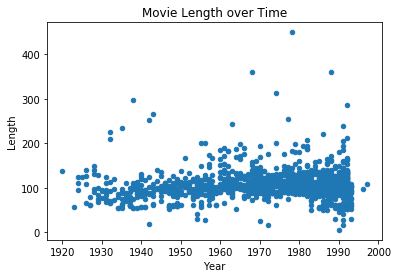

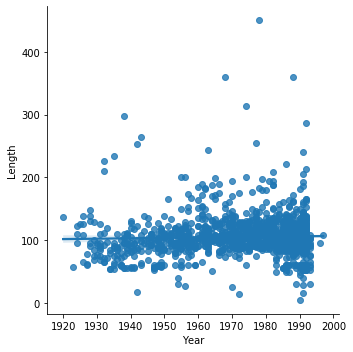

In [102]:
# create scatter plot
df.plot(kind="scatter", x = "Year", y = "Length", title = "Movie Length over Time");
sns.lmplot(x = "Year", y = "Length", data = df);
# your code here

In [103]:
corr = 0.5
# your code here
corr = df["Year"].corr(df["Length"])

In [104]:
corr

0.03473224518097785

9. Think of an interesting question involving two or more variables and answer it with a table or plot.

Do popularity values differe across genres? Are some genres more popular than others?

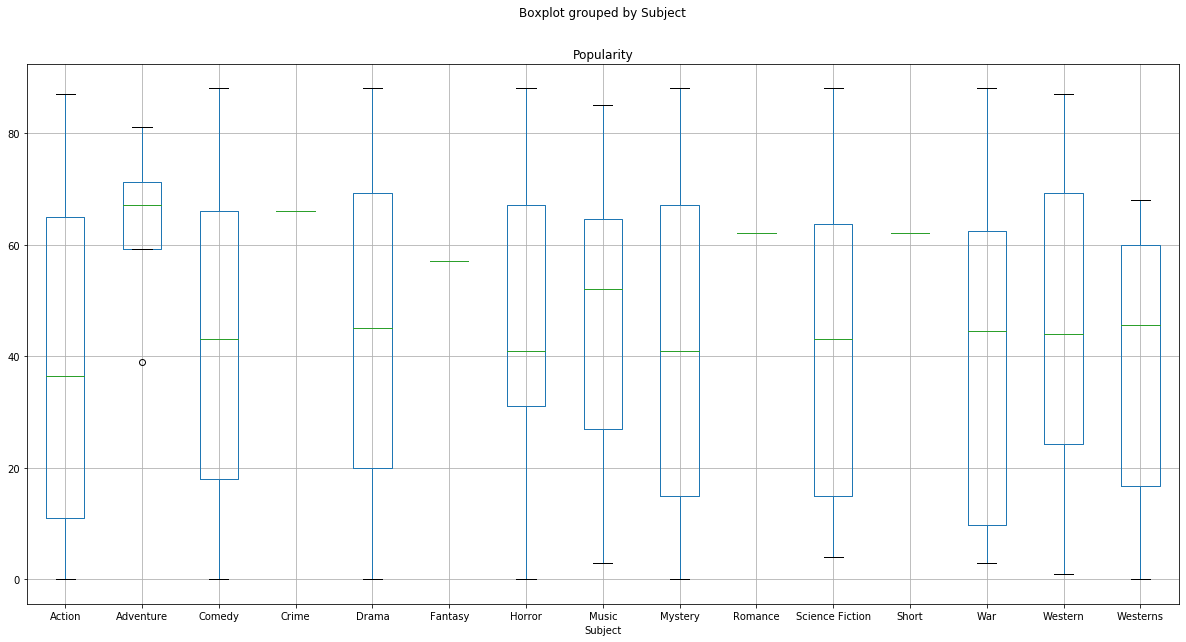

In [236]:
# your code here
dfTemp.boxplot(column = "Popularity", by = "Subject", figsize = (20,10));